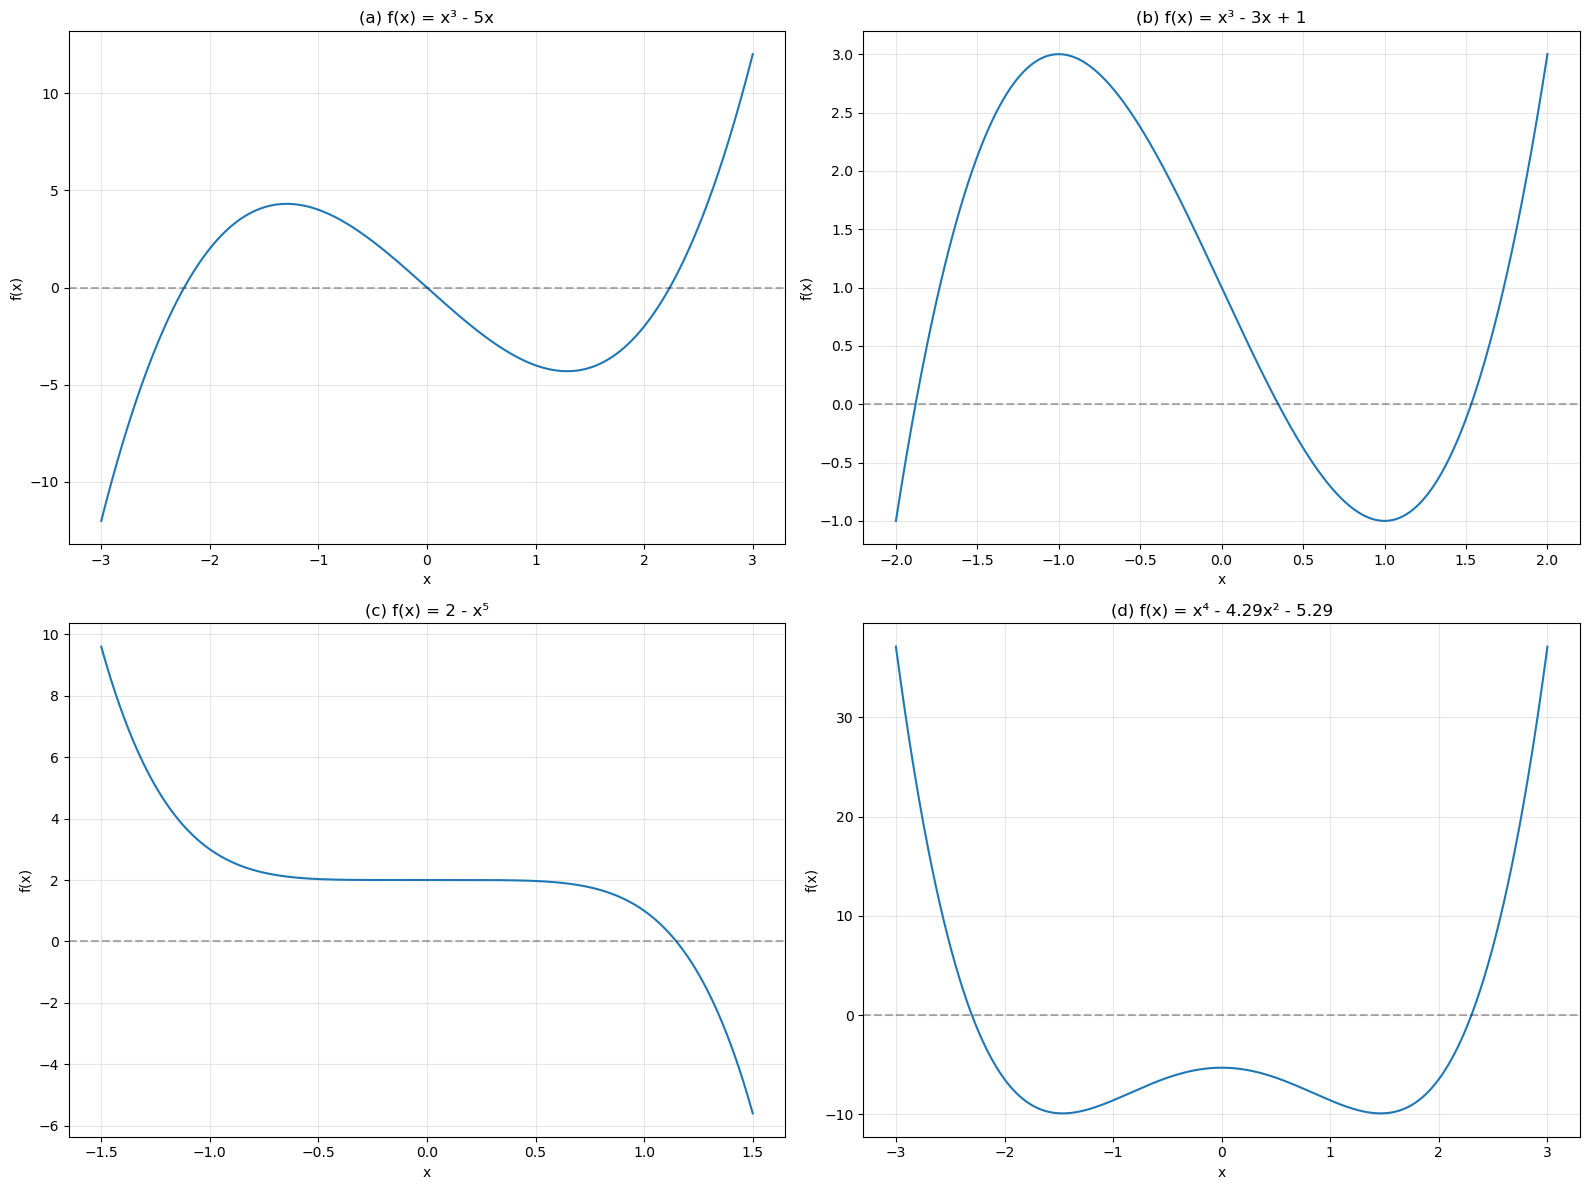

Próba metody Newtona i bisection jako zapasowa:

(a)
Newton FAIL: Failed to converge after 50 iterations, value is 1.0.
Bisect OK: znaleziono pierwiastek x = 0.0

(b)
Newton FAIL: Derivative was zero. Failed to converge after 1 iterations, value is 1.0.
Bisect OK: znaleziono pierwiastek x = 0.3472963553340378

(c)
Newton FAIL: Failed to converge after 50 iterations, value is 713.6238464957056.
Bisect OK: znaleziono pierwiastek x = 1.148698354996668

(d)
Newton FAIL: Failed to converge after 50 iterations, value is 0.7876130494100906.
Bisect OK: znaleziono pierwiastek x = 2.3000000000010914


In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


def f_a(x):
    return x**3 - 5 * x


def df_a(x):
    return 3 * x**2 - 5


def f_b(x):
    return x**3 - 3 * x + 1


def df_b(x):
    return 3 * x**2 - 3


def f_c(x):
    return 2 - x**5


def df_c(x):
    return -5 * x**4


def f_d(x):
    return x**4 - 4.29 * x**2 - 5.29


def df_d(x):
    return 4 * x**3 - 8.58 * x


plt.figure(figsize=(16, 12))

# Plot function (a)
plt.subplot(2, 2, 1)
x_vals = np.linspace(-3, 3, 1000)
y_vals = f_a(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="k", linestyle="--", alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title("(a) f(x) = x³ - 5x")
plt.xlabel("x")
plt.ylabel("f(x)")

# Plot function (b)
plt.subplot(2, 2, 2)
x_vals = np.linspace(-2, 2, 1000)
y_vals = f_b(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="k", linestyle="--", alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title("(b) f(x) = x³ - 3x + 1")
plt.xlabel("x")
plt.ylabel("f(x)")

# Plot function (c)
plt.subplot(2, 2, 3)
x_vals = np.linspace(-1.5, 1.5, 1000)
y_vals = f_c(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="k", linestyle="--", alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title("(c) f(x) = 2 - x⁵")
plt.xlabel("x")
plt.ylabel("f(x)")

# Plot function (d)
plt.subplot(2, 2, 4)
x_vals = np.linspace(-3, 3, 1000)
y_vals = f_d(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color="k", linestyle="--", alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title("(d) f(x) = x⁴ - 4.29x² - 5.29")
plt.xlabel("x")
plt.ylabel("f(x)")

plt.tight_layout()
plt.show()


print("Próba metody Newtona i bisection jako zapasowa:")

# (a) f(x) = x^3 - 5x, x0 = 1
print("\n(a)")
try:
    result_a = optimize.newton(f_a, 1.0, fprime=df_a)
    print(f"Newton OK: znaleziono pierwiastek x = {result_a}")
except RuntimeError as e:
    print(f"Newton FAIL: {str(e)}")

    try:
        result_a = optimize.bisect(f_a, -1, 1)
        print(f"Bisect OK: znaleziono pierwiastek x = {result_a}")
    except ValueError as e:
        print(f"Bisect FAIL: {str(e)}")

# (b) f(x) = x^3 - 3x + 1, x0 = 1
print("\n(b)")
try:
    result_b = optimize.newton(f_b, 1.0, fprime=df_b)
    print(f"Newton OK: znaleziono pierwiastek x = {result_b}")
except RuntimeError as e:
    print(f"Newton FAIL: {str(e)}")
    try:
        result_b = optimize.bisect(f_b, 0, 1)
        print(f"Bisect OK: znaleziono pierwiastek x = {result_b}")
    except ValueError as e:
        print(f"Bisect FAIL: {str(e)}")

# (c) f(x) = 2 - x^5, x0 = 0.01
print("\n(c)")
try:
    result_c = optimize.newton(f_c, 0.01, fprime=df_c)
    print(f"Newton OK: znaleziono pierwiastek x = {result_c}")
except RuntimeError as e:
    print(f"Newton FAIL: {str(e)}")
    try:
        result_c = optimize.bisect(f_c, 1, 2)
        print(f"Bisect OK: znaleziono pierwiastek x = {result_c}")
    except ValueError as e:
        print(f"Bisect FAIL: {str(e)}")

# (d) f(x) = x^4 - 4.29x^2 - 5.29, x0 = 0.8
print("\n(d)")
try:
    result_d = optimize.newton(f_d, 0.8, fprime=df_d)
    print(f"Newton OK: znaleziono pierwiastek x = {result_d}")
except RuntimeError as e:
    print(f"Newton FAIL: {str(e)}")

    try:
        result_d = optimize.bisect(f_d, 1, 3)
        print(f"Bisect OK: znaleziono pierwiastek x = {result_d}")
    except ValueError as e:
        print(f"Bisect FAIL: {str(e)}")

In [2]:
import pandas as pd
from IPython.display import display


def phi1(x):
    return (x**2 + 2) / 3


def phi2(x):
    return np.sqrt(3 * x - 2)


def phi3(x):
    return 3 - 2 / x


def phi4(x):
    return (x**2 - 2) / (2 * x - 3)


phi = [phi1, phi2, phi3, phi4]
names = [r"$\phi_1(x)$", r"$\phi_2(x)$", r"$\phi_3(x)$", r"$\phi_4(x)$"]
alpha = 2
x0 = 3
iterations = 10
results = []

for i in range(len(phi)):
    x = x0
    history = [x]
    for _ in range(iterations):
        x = phi[i](x)
        history.append(x)
    results.append(history)


results_df = pd.DataFrame(
    {names[i]: results[i] for i in range(len(names))},
    index=[f"Iteration {i}" for i in range(len(results[0]))],
)


results_df = results_df.round(6)


print("Fixed point iteration results:")
display(results_df)

Fixed point iteration results:


,$\phi_1(x)$,$\phi_2(x)$,$\phi_3(x)$,$\phi_4(x)$
Iteration 0,3.000000e+00,3.000000,3.000000,3.000000
Iteration 1,3.666667e+00,2.645751,2.333333,2.333333
Iteration 2,5.148148e+00,2.436648,2.142857,2.066667
Iteration 3,9.501143e+00,2.304332,2.066667,2.003922
Iteration 4,3.075724e+01,2.216528,2.032258,2.000015
Iteration 5,3.160026e+02,2.156289,2.015873,2.000000
Iteration 6,3.328655e+04,2.113970,2.007874,2.000000
Iteration 7,3.693315e+08,2.083725,2.003922,2.000000
Iteration 8,4.546858e+16,2.061838,2.001957,2.000000
Iteration 9,6.891304e+32,2.045853,2.000978,2.000000


In [3]:
experimental_orders = []
for i, history in enumerate(results):
    errors = np.abs(np.array(history) - alpha)
    orders = []
    for k in range(1, len(errors) - 1):
        if i == 3 and k > 4:
            orders.append(np.nan)
            continue
        if errors[k] != 0 and errors[k - 1] != 0:
            r = np.log(errors[k + 1] / errors[k]) / np.log(errors[k] / errors[k - 1])
            orders.append(r)

    experimental_orders.append(orders)

orders_df = pd.DataFrame(
    {names[i]: experimental_orders[i] for i in range(len(names))},
    index=[f"Iteration {i + 1}" for i in range(len(experimental_orders[0]))],
)


orders_df = orders_df.round(4)


print("Experimental convergence orders:")
display(orders_df)

Experimental convergence orders:


,$\phi_1(x)$,$\phi_2(x)$,$\phi_3(x)$,$\phi_4(x)$
Iteration 1,1.2450,0.8947,0.7712,1.4650
Iteration 2,1.3652,0.9226,0.8995,1.7604
Iteration 3,1.5478,0.9429,0.9525,1.9586
Iteration 4,1.7789,0.9577,0.9769,1.9986
Iteration 5,1.9508,0.9686,0.9886,NaN
Iteration 6,1.9973,0.9766,0.9943,NaN
Iteration 7,2.0000,0.9826,0.9972,NaN
Iteration 8,2.0000,0.9870,0.9986,NaN
Iteration 9,2.0000,0.9903,0.9993,NaN


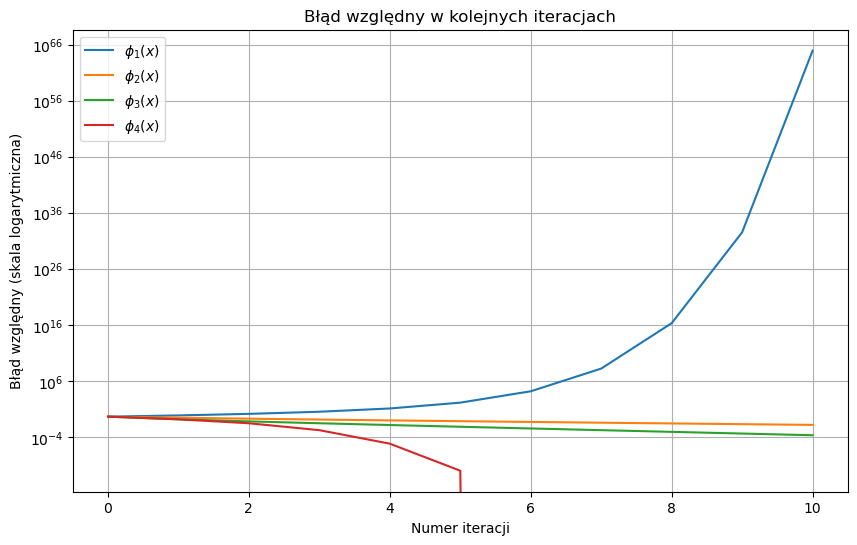

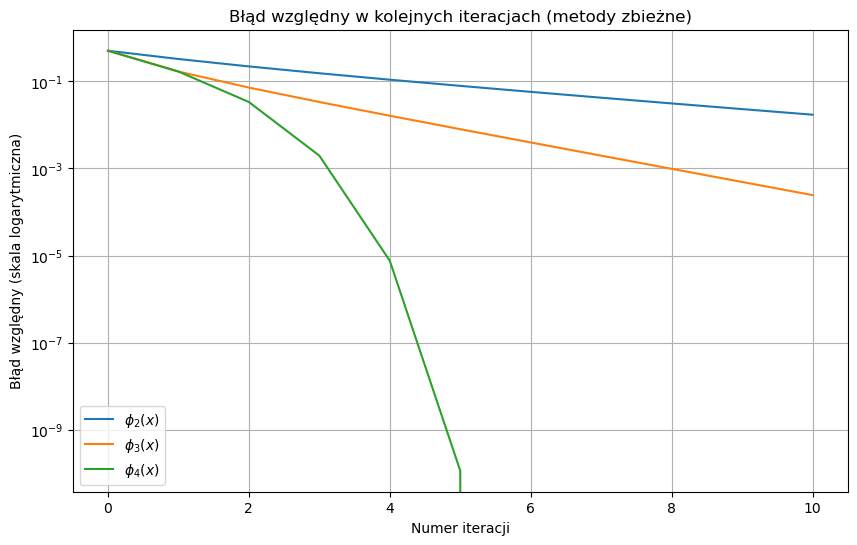

In [4]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(results):
    errors_relative = np.abs((np.array(history) - alpha) / alpha)
    plt.semilogy(range(len(errors_relative)), errors_relative, label=names[i])
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd względny (skala logarytmiczna)")
plt.title("Błąd względny w kolejnych iteracjach")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i, history in enumerate(results):
    errors_relative = np.abs((np.array(history) - alpha) / alpha)
    if i in [1, 2, 3]:
        plt.semilogy(range(len(errors_relative)), errors_relative, label=names[i])
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd względny (skala logarytmiczna)")
plt.title("Błąd względny w kolejnych iteracjach (metody zbieżne)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def f_a(x):
    return x**3 - 2 * x - 5


def df_a(x):
    return 3 * x**2 - 2


def f_b(x):
    return np.exp(-x) - x


def df_b(x):
    return -np.exp(-x) - 1


def f_c(x):
    return x * np.sin(x) - 1


def df_c(x):
    return np.sin(x) + x * np.cos(x)

In [6]:
def iter_a(x):
    return x - f_a(x) / df_a(x)


def iter_b(x):
    return x - f_b(x) / df_b(x)


def iter_c(x):
    return x - f_c(x) / df_c(x)

In [7]:
def solve_iter_iterative(iter_fun, x0, max_iter=30):
    x = x0
    for _ in range(max_iter):
        x = iter_fun(x)
    return x


solutions = pd.DataFrame(
    [
        solve_iter_iterative(iter_a, 2),
        solve_iter_iterative(iter_b, 0.5),
        solve_iter_iterative(iter_c, 1),
    ]
)

real_solutions = np.array(
    [2.0945514815423, 0.56714352628852, 1.1141571379514], dtype=np.double
)


def solve_iter_with_precision_iterative(iter_fun, x0, tolerance=1e-7, max_iter=100):
    x = x0
    for iteration in range(max_iter):
        x_next = iter_fun(x)
        if abs(x_next - x) < tolerance:
            return x_next, iteration + 1
        x = x_next
    return x, max_iter


solutions4bit = pd.DataFrame(
    [
        solve_iter_with_precision_iterative(iter_a, np.double(2), np.pow(1 / 2, 4)),
        solve_iter_with_precision_iterative(iter_b, np.double(0.5), np.pow(1 / 2, 4)),
        solve_iter_with_precision_iterative(iter_c, np.double(1), np.pow(1 / 2, 4)),
    ]
)


solutions4bit = pd.DataFrame(solutions4bit, columns=[0, 1])


solutions24bit = pd.DataFrame(
    [
        solve_iter_with_precision_iterative(
            iter_a, solutions4bit.iloc[0, 0], np.pow(1 / 2, 24)
        ),
        solve_iter_with_precision_iterative(
            iter_b, solutions4bit.iloc[1, 0], np.pow(1 / 2, 24)
        ),
        solve_iter_with_precision_iterative(
            iter_c, solutions4bit.iloc[2, 0], np.pow(1 / 2, 24)
        ),
    ]
)
display(solutions4bit)
display(solutions24bit)

,0,1
0,2.094568,2
1,0.567143,2
2,1.114157,2


,0,1
0,2.094551,2
1,0.567143,2
2,1.114157,1


In [8]:
def f(x):
    x1, x2 = x
    return np.array([x1**2 + x2**2 - 1, x1**2 - x2])


def jacobian(x):
    x1, x2 = x
    return np.array([[2 * x1, 2 * x2], [2 * x1, -1]])


def newton_system(x0, tol=1e-9, max_iter=100):
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        fx = f(x)
        jx = jacobian(x)
        try:
            delta = np.linalg.solve(jx, -fx)
            x = x + delta
            if np.linalg.norm(delta) < tol:
                return x, i + 1
        except np.linalg.LinAlgError:
            print("Macierz Jacobiego jest osobliwa.")
            return None, i
    print("Maksymalna liczba iteracji osiągnięta bez zbieżności.")
    return x, max_iter


phi = (np.sqrt(5) - 1) / 2
exact_x1_pos = np.sqrt(phi)
exact_x1_neg = -np.sqrt(phi)
exact_x2 = phi

exact_solution_pos = np.array([exact_x1_pos, exact_x2])
exact_solution_neg = np.array([exact_x1_neg, exact_x2])

x0 = np.array([1.0, 1.0], dtype=np.double)

approx_solution_pos, iterations_pos = newton_system(x0)


print("Wyniki dla rozwiązania z dodatnim x1:")
print(
    f"Wartość teoretyczna: x1 = {exact_solution_pos[0]:.8f}, x2 = {exact_solution_pos[1]:.8f}"
)
print(
    f"Wartość numeryczna (metoda Newtona): x1 = {approx_solution_pos[0]:.8f}, x2 = {approx_solution_pos[1]:.8f}"
)

err_pos = np.abs((approx_solution_pos - exact_solution_pos) / exact_solution_pos)

print(f"Błąd względny składowej x1: {err_pos[0]:.8e}")
print(f"Błąd względny składowej x2: {err_pos[1]:.8e}")


x0_neg = np.array([-1.0, 1.0], dtype=np.double)
approx_solution_neg, iterations_neg = newton_system(x0_neg)

print("\nWyniki dla rozwiązania z ujemnym x1:")
print(
    f"Wartość teoretyczna: x1 = {exact_solution_neg[0]:.8f}, x2 = {exact_solution_neg[1]:.8f}"
)
print(
    f"Wartość numeryczna (metoda Newtona): x1 = {approx_solution_neg[0]:.8f}, x2 = {approx_solution_neg[1]:.8f}"
)

err_neg = np.abs((approx_solution_neg - exact_solution_neg) / exact_solution_neg)

print(f"Błąd względny składowej x1: {err_neg[0]:.8e}")
print(f"Błąd względny składowej x2: {err_neg[1]:.8e}")

Wyniki dla rozwiązania z dodatnim x1:
Wartość teoretyczna: x1 = 0.78615138, x2 = 0.61803399
Wartość numeryczna (metoda Newtona): x1 = 0.78615138, x2 = 0.61803399
Błąd względny składowej x1: 0.00000000e+00
Błąd względny składowej x2: 1.79637859e-16

Wyniki dla rozwiązania z ujemnym x1:
Wartość teoretyczna: x1 = -0.78615138, x2 = 0.61803399
Wartość numeryczna (metoda Newtona): x1 = -0.78615138, x2 = 0.61803399
Błąd względny składowej x1: 0.00000000e+00
Błąd względny składowej x2: 1.79637859e-16
